In [1]:
import matplotlib.pyplot as plt
import numpy as np

import data.loader as loader
from skimage.metrics import structural_similarity as ssim

from denoising.gaussian import gaussian_filter
import matplotlib.animation as animation

from denoising.HYPERPARAMS import *
from eval import eval_denoising_method

In [3]:
wv = np.load('results_params/wavelet_ssim_1000f.npy', allow_pickle=True)
wv_params = np.load('results_params/wavelet_ssim_1000f_H.npy', allow_pickle=True)

In [16]:
wv = np.array(wv, dtype=np.float64)
wv

array([[[0.21926947, 0.22103055, 0.21953532],
        [0.23211824, 0.22896077, 0.23088236]],

       [[0.25881936, 0.2607683 , 0.26042689],
        [0.26821304, 0.26655076, 0.26675847]],

       [[0.31227962, 0.31771756, 0.31613638],
        [0.32902274, 0.32398763, 0.32539177]],

       [[0.29230597, 0.29235173, 0.29239664],
        [0.29180529, 0.2916205 , 0.29159883]],

       [[0.29930134, 0.29999362, 0.29890038],
        [0.29893233, 0.29960295, 0.29887123]]])

In [38]:
wv_params

array([[[{'wavelet': 'haar', 'mode': 'soft', 'spacing_ratio': 0.5},
         {'wavelet': 'db4', 'mode': 'soft', 'spacing_ratio': 0.5},
         {'wavelet': 'sym5', 'mode': 'soft', 'spacing_ratio': 0.5}],
        [{'wavelet': 'haar', 'mode': 'hard', 'spacing_ratio': 0.5},
         {'wavelet': 'db4', 'mode': 'hard', 'spacing_ratio': 0.5},
         {'wavelet': 'sym5', 'mode': 'hard', 'spacing_ratio': 0.5}]],

       [[{'wavelet': 'haar', 'mode': 'soft', 'spacing_ratio': 0.75},
         {'wavelet': 'db4', 'mode': 'soft', 'spacing_ratio': 0.75},
         {'wavelet': 'sym5', 'mode': 'soft', 'spacing_ratio': 0.75}],
        [{'wavelet': 'haar', 'mode': 'hard', 'spacing_ratio': 0.75},
         {'wavelet': 'db4', 'mode': 'hard', 'spacing_ratio': 0.75},
         {'wavelet': 'sym5', 'mode': 'hard', 'spacing_ratio': 0.75}]],

       [[{'wavelet': 'haar', 'mode': 'soft', 'spacing_ratio': 1.0},
         {'wavelet': 'db4', 'mode': 'soft', 'spacing_ratio': 1.0},
         {'wavelet': 'sym5', 'mode': 's

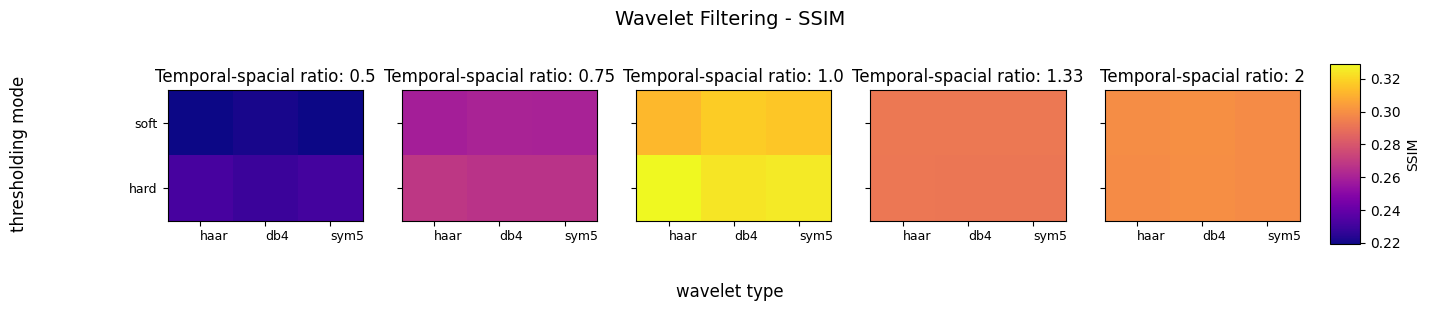

In [76]:
data = wv.copy()

fig, axes = plt.subplots(1, 5, figsize=(15, 3), sharey=True)

fig.supxlabel('wavelet type')
fig.supylabel('thresholding mode')

vmin = np.min(data)
vmax = np.max(data)

row_labels = ["soft", "hard"]
col_labels = ["haar", "db4", "sym5"]
spacing_ratios = [0.5, 0.75, 1.0, 1.33, 2]

# Plot each slice
for i, ax in enumerate(axes):
    im = ax.imshow(data[i], cmap='plasma', vmin=vmin, vmax=vmax)
    ax.set_title(f"Temporal-spacial ratio: {spacing_ratios[i]}")

    ax.set_xticks(range(3))
    ax.set_xticklabels(col_labels, ha='left', fontsize=9)

    ax.set_yticks(range(2))
    ax.set_yticklabels(row_labels, fontsize=9)

# Add a shared colorbar
fig.subplots_adjust(right=0.88)
cbar_ax = fig.add_axes([0.9, 0.2, 0.02, 0.6])
fig.colorbar(im, cax=cbar_ax).set_label("SSIM")

plt.suptitle("Wavelet Filtering - SSIM", fontsize=14)
plt.show()

In [58]:
tv = np.array([
    np.array(np.load('results_params/tv_ssim_1000f_sr1.npy', allow_pickle=True), dtype=np.float64),
    np.array(np.load('results_params/tv_ssim_1000f_sr2.npy', allow_pickle=True), dtype=np.float64),
    np.array(np.load('results_params/tv_ssim_1000f_sr3.npy', allow_pickle=True), dtype=np.float64),
])
tv_params = [
    np.load('results_params/tv_ssim_1000f_sr1_H.npy', allow_pickle=True),
    np.load('results_params/tv_ssim_1000f_sr2_H.npy', allow_pickle=True),
    np.load('results_params/tv_ssim_1000f_sr3_H.npy', allow_pickle=True)
]

In [59]:
tv

array([[[0.26132416, 0.25714058, 0.25208013, 0.2462074 , 0.23963168,
         0.23250851, 0.22503022, 0.21741046, 0.20980213, 0.20237489]],

       [[0.30493077, 0.30760489, 0.30912597, 0.30943058, 0.30846193,
         0.30620187, 0.30267321, 0.29795818, 0.29221965, 0.28568554]],

       [[0.29152387, 0.29054687, 0.28861444, 0.28577944, 0.28212334,
         0.27775989, 0.272824  , 0.26747008, 0.26185439, 0.25614192]]])

In [53]:
tv_params

[array([[{'weight': 0.002, 'spacing_ratio': 0.75},
         {'weight': 0.004, 'spacing_ratio': 0.75},
         {'weight': 0.006, 'spacing_ratio': 0.75},
         {'weight': 0.008, 'spacing_ratio': 0.75},
         {'weight': 0.01, 'spacing_ratio': 0.75},
         {'weight': 0.012, 'spacing_ratio': 0.75},
         {'weight': 0.014, 'spacing_ratio': 0.75},
         {'weight': 0.016, 'spacing_ratio': 0.75},
         {'weight': 0.018, 'spacing_ratio': 0.75},
         {'weight': 0.02, 'spacing_ratio': 0.75}]], dtype=object),
 array([[{'weight': 0.002, 'spacing_ratio': 1.0},
         {'weight': 0.004, 'spacing_ratio': 1.0},
         {'weight': 0.006, 'spacing_ratio': 1.0},
         {'weight': 0.008, 'spacing_ratio': 1.0},
         {'weight': 0.01, 'spacing_ratio': 1.0},
         {'weight': 0.012, 'spacing_ratio': 1.0},
         {'weight': 0.014, 'spacing_ratio': 1.0},
         {'weight': 0.016, 'spacing_ratio': 1.0},
         {'weight': 0.018, 'spacing_ratio': 1.0},
         {'weight': 0.02, 

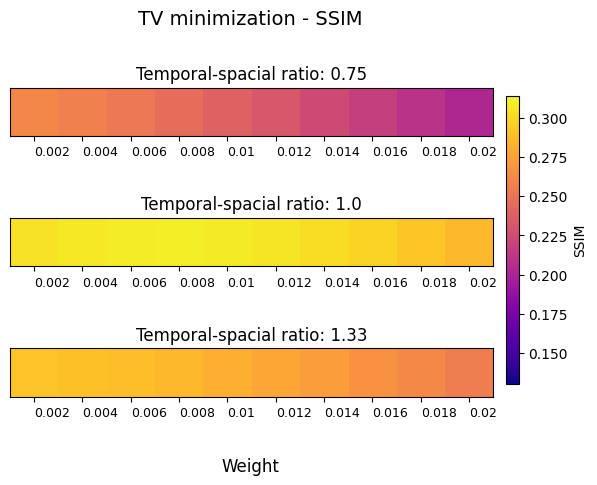

In [75]:
data = tv.copy()

fig, axes = plt.subplots(3, 1)

fig.supxlabel('Weight')

labels = [h / 1000 for h in range(2, 21, 2)]
spacing_ratios = [0.75, 1.0, 1.33]

for i, ax in enumerate(axes):
    im = ax.imshow(data[i], cmap='plasma', vmin=vmin, vmax=vmax)
    ax.set_title(f"Temporal-spacial ratio: {spacing_ratios[i]}")

    ax.set_xticks(range(10))
    ax.set_xticklabels(labels, ha='left', fontsize=9)

    ax.set_yticks([])


fig.subplots_adjust(right=0.88)
cbar_ax = fig.add_axes([0.9, 0.2, 0.02, 0.6])
fig.colorbar(im, cax=cbar_ax).set_label("SSIM")

plt.suptitle("TV minimization - SSIM", fontsize=14)
plt.show()

In [65]:
anisotropic = np.array([
    np.array(np.load('results_params/anisotropic_ssim_1000f_sr1.npy', allow_pickle=True), dtype=np.float64),
    np.array(np.load('results_params/anisotropic_ssim_1000f_sr2.npy', allow_pickle=True), dtype=np.float64),
    np.array(np.load('results_params/WIN_anisotropic_ssim_1000f_sr3.npy', allow_pickle=True), dtype=np.float64),
])
anisotropic_params = [
    np.load('results_params/anisotropic_ssim_1000f_sr1_H.npy', allow_pickle=True),
    np.load('results_params/anisotropic_ssim_1000f_sr2_H.npy', allow_pickle=True),
    np.load('results_params/WIN_anisotropic_ssim_1000f_sr3_H.npy', allow_pickle=True)
]

In [111]:
anisotropic[1][0][0]

array([[0.30153767, 0.30186578, 0.30216774, 0.30244403, 0.30269614,
        0.30292601, 0.3031357 ],
       [0.30467709, 0.30775296, 0.31028675, 0.31218227, 0.31337039,
        0.31381419, 0.31351647],
       [0.30861508, 0.31320729, 0.31431871, 0.31201615, 0.30692356,
        0.2998509 , 0.29152446],
       [0.31081226, 0.31316131, 0.30863549, 0.2993926 , 0.28765214,
        0.27496621, 0.26226018],
       [0.31145205, 0.3102866 , 0.30085432, 0.28738219, 0.27271317,
        0.25831471, 0.24483712]])

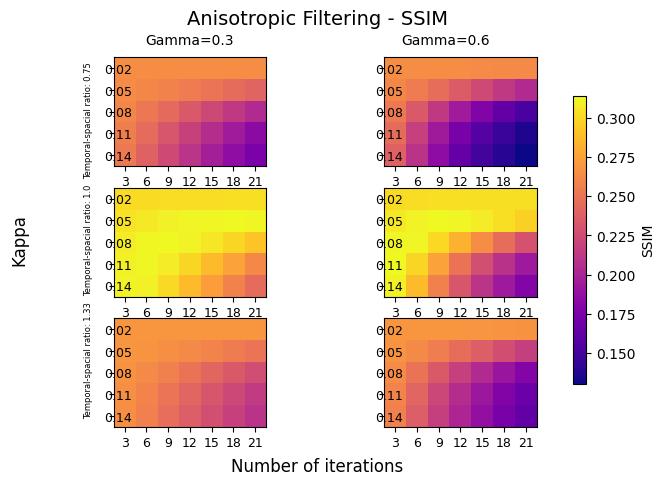

In [105]:
data = anisotropic.copy()

fig, axes = plt.subplots(3, 2)

vmin = np.min(data)
vmax = np.max(data)

fig.supxlabel('Number of iterations')
fig.supylabel('Kappa')

row_labels = ["Soft thresholding", "Hard thresholding"]
col_labels = ["haar", "db4", "sym5"]
spacing_ratios = [0.5, 0.75, 1.0, 1.33, 2]

# Plot each slice
for i in range(3):
    for j in range(2):
        ax = axes[i][j]
        im = ax.imshow(data[i,0,j], cmap='plasma', vmin=vmin, vmax=vmax)
        # ax.set_title(f"o")

        ax.set_yticks(range(5))
        ax.set_yticklabels([kpp /100 for kpp in range(2, 15, 3)], ha='left', fontsize=9)
        #
        ax.set_xticks(range(7))
        ax.set_xticklabels([niter for niter in range(3, 22, 3)], fontsize=9)

fig.text(0.3, 0.9, "Gamma=0.3", ha='center', va='bottom')
fig.text(0.7, 0.9, "Gamma=0.6", ha='center', va='bottom')

fig.text(0.15, 0.75, "Temporal-spacial ratio: 0.75", ha='right', va='center', rotation=90, fontsize=6)
fig.text(0.15, 0.5, "Temporal-spacial ratio: 1.0", ha='right', va='center', rotation=90, fontsize=6)
fig.text(0.15, 0.25, "Temporal-spacial ratio: 1.33", ha='right', va='center', rotation=90, fontsize=6)

cbar_ax = fig.add_axes([0.9, 0.2, 0.02, 0.6])
fig.colorbar(im, cax=cbar_ax).set_label("SSIM")

plt.suptitle("Anisotropic Filtering - SSIM", fontsize=14)
plt.show()

In [2]:
gauss = np.load('results_params/WIN_gaussian_ssim_1000f.npy', allow_pickle=True)
gauss_params = np.load('results_params/WIN_gaussian_ssim_1000f_H.npy', allow_pickle=True)
gauss = np.array(gauss, dtype=np.float64)

In [3]:
gauss

array([[[0.28490746, 0.27510935, 0.2245035 ],
        [0.30810122, 0.28625131, 0.22831986],
        [0.31946724, 0.29154094, 0.23050552],
        [0.32287694, 0.29315288, 0.23131813],
        [0.32397984, 0.29368282, 0.23160877]],

       [[0.28490745, 0.2751295 , 0.22453091],
        [0.30793766, 0.28617921, 0.22829423],
        [0.31950252, 0.29155478, 0.23050817],
        [0.32407029, 0.29372412, 0.23163192],
        [0.32616923, 0.29475578, 0.23225005]],

       [[0.28490745, 0.2751483 , 0.22490106],
        [0.30772483, 0.28608251, 0.22861647],
        [0.31917926, 0.2914    , 0.23079768],
        [0.32392664, 0.29365314, 0.23196371],
        [0.32653574, 0.29494333, 0.23275059]]])

In [4]:
gauss_params

array([[[{'kernel_size': 5, 'sigma_xy': 0.2, 'sigma_t': 0.2},
         {'kernel_size': 5, 'sigma_xy': 0.5, 'sigma_t': 0.2},
         {'kernel_size': 5, 'sigma_xy': 0.8, 'sigma_t': 0.2}],
        [{'kernel_size': 5, 'sigma_xy': 0.2, 'sigma_t': 0.6},
         {'kernel_size': 5, 'sigma_xy': 0.5, 'sigma_t': 0.6},
         {'kernel_size': 5, 'sigma_xy': 0.8, 'sigma_t': 0.6}],
        [{'kernel_size': 5, 'sigma_xy': 0.2, 'sigma_t': 1.0},
         {'kernel_size': 5, 'sigma_xy': 0.5, 'sigma_t': 1.0},
         {'kernel_size': 5, 'sigma_xy': 0.8, 'sigma_t': 1.0}],
        [{'kernel_size': 5, 'sigma_xy': 0.2, 'sigma_t': 1.4},
         {'kernel_size': 5, 'sigma_xy': 0.5, 'sigma_t': 1.4},
         {'kernel_size': 5, 'sigma_xy': 0.8, 'sigma_t': 1.4}],
        [{'kernel_size': 5, 'sigma_xy': 0.2, 'sigma_t': 1.8},
         {'kernel_size': 5, 'sigma_xy': 0.5, 'sigma_t': 1.8},
         {'kernel_size': 5, 'sigma_xy': 0.8, 'sigma_t': 1.8}]],

       [[{'kernel_size': 7, 'sigma_xy': 0.2, 'sigma_t': 0.2},
 

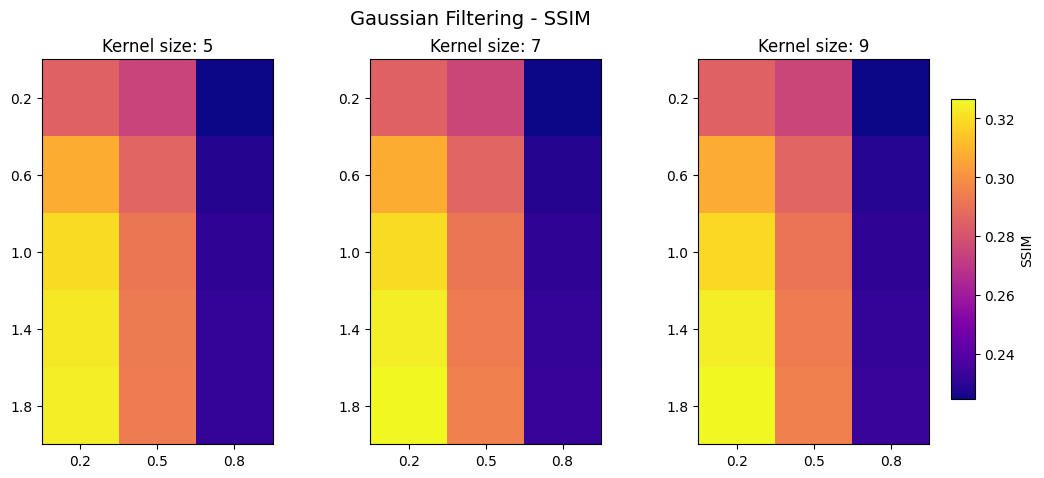

In [11]:
data = gauss.copy()
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

vmin = np.min(data)
vmax = np.max(data)

for i in range(3):
    ax = axes[i]
    im = ax.imshow(data[i], cmap='plasma', vmin=vmin, vmax=vmax)
    ax.set_title(f"Kernel size: {2 * i + 5}")

    ax.set_yticks(range(5))
    ax.set_yticklabels([0.2, 0.6, 1.0, 1.4, 1.8])
    ax.set_xticks(range(3))
    ax.set_xticklabels([0.2, 0.5, 0.8])

cbar_ax = fig.add_axes([0.9, 0.2, 0.02, 0.6])
fig.colorbar(im, cax=cbar_ax).set_label("SSIM")

plt.suptitle("Gaussian Filtering - SSIM", fontsize=14)
plt.show()